## Задание 1

1. Скачать данные по ссылке 
2. Считать данные с помощью pandas
3. Вывести на экран первые 5 строк



In [2]:
import pandas as pd
df = pd.read_csv('laptops_10.csv', sep = ',')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


#### 1.1 Изучите количество памяти с помощью matplotlib


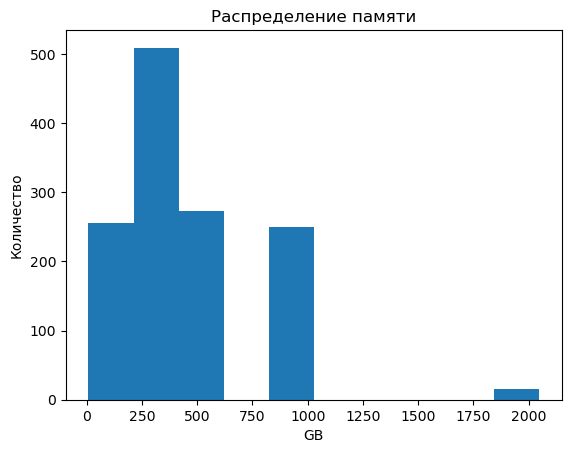

In [4]:
import matplotlib.pyplot as plt
plt.hist(df['Memory_Amount'])
plt.title('Распределение памяти')
plt.xlabel('GB')
plt.ylabel('Количество');


#### 1.2 Изучите стоимость ноутбуков с помощью matplotlib


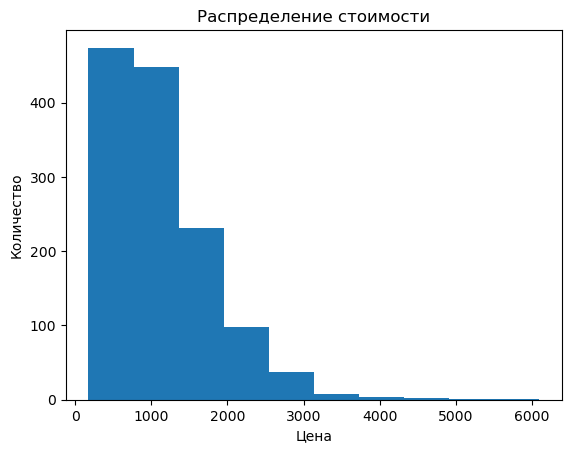

In [5]:
plt.hist(df['Price_euros'])
plt.title('Распределение стоимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

#### 1.3 Изучите вес ноутбуков с помощью matplotlib
1. Постройте график
2. Назовите график
3. Сделайте именование оси x и оси y
4. Сделайте выводы


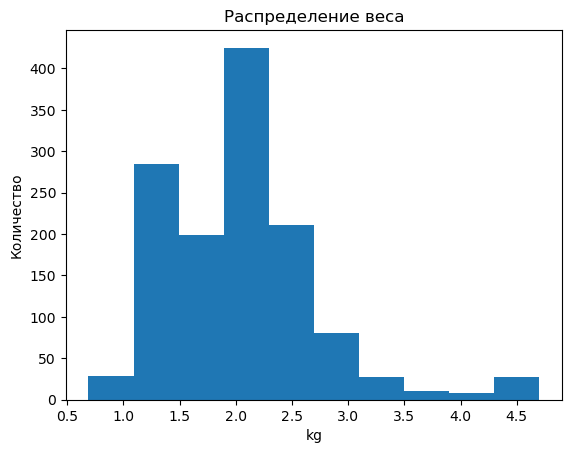

In [6]:
plt.hist(df['Weight'])
plt.title('Распределение веса')
plt.xlabel('kg')
plt.ylabel('Количество');

## Задание 2.

#### 2.1 Изучите распределение типов носителя


In [7]:
data = df['Memory_Type'].value_counts()
data

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

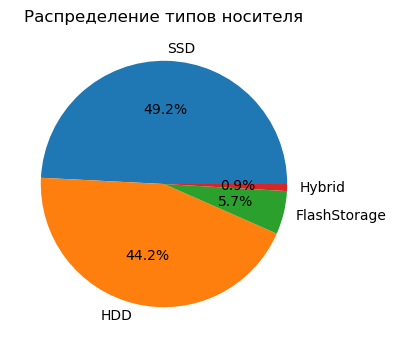

In [23]:
plt.figure(figsize = (6,4))
data = df['Memory_Type'].value_counts()
plt.pie(data.values, autopct ='%1.1f%%', labels = data.index)
plt.title('Распределение типов носителя');

#### 2.2 Изучите распределение компаний производителей


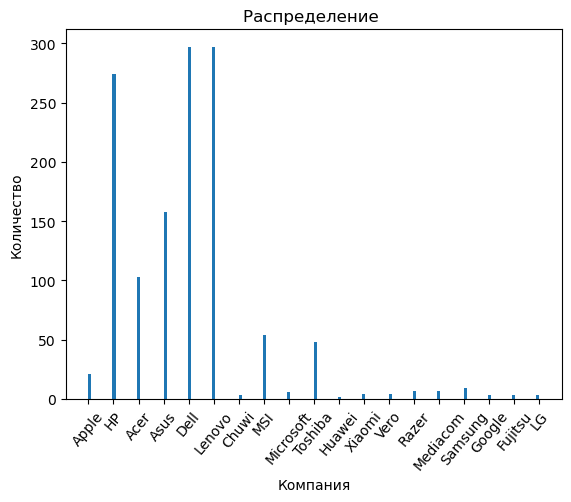

In [25]:
plt.hist(df['Company'], bins = 150)
plt.title('Распределение ')
plt.xlabel('Компания')
plt.ylabel('Количество')
plt.xticks(rotation = 50);

#### 2.3 Изучите распределение операционной системы


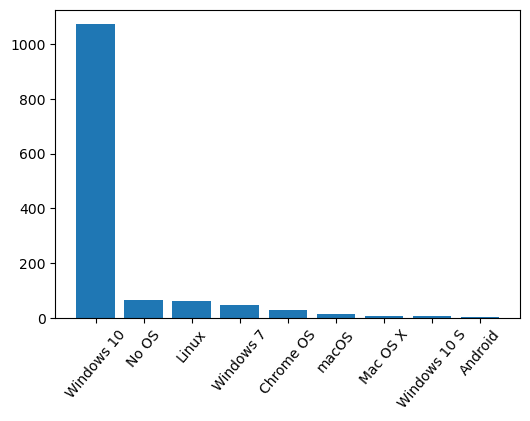

In [31]:
plt.figure(figsize = (6,4))
data = df['OpSys'].value_counts()
plt.bar(data.index , data.values)
plt.xticks(rotation = 50);         


#### 2.4 Изучите распределение компаний производителей CPU


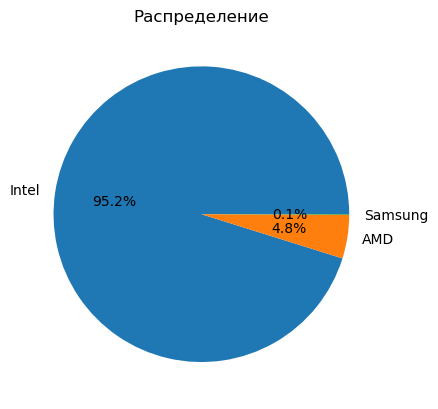

In [34]:

data = df['Cpu_Company'].value_counts()
plt.pie(data.values, autopct ='%1.1f%%', labels = data.index)
plt.title('Распределение');

## 3 задача

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте 

#### 3.1 Постройте график в абсолютных величинах

In [46]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
data = data.drop(columns=['Samsung']).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


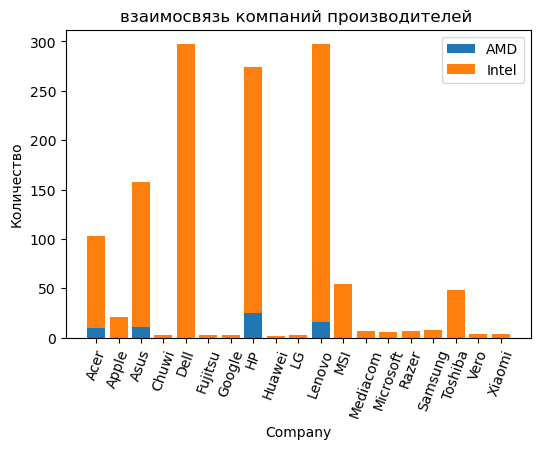

In [52]:
plt.figure(figsize = (6, 4))

plt.bar(data['Company'], data['AMD'])
plt.bar(data['Company'], data['Intel'],bottom=data['AMD'])

plt.title('взаимосвязь компаний производителей ')
plt.xlabel('Company')
plt.ylabel('Количество')
plt.legend(['AMD','Intel'])
plt.xticks(data['Company'], rotation = 70); 

## Задание 4.

#### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора


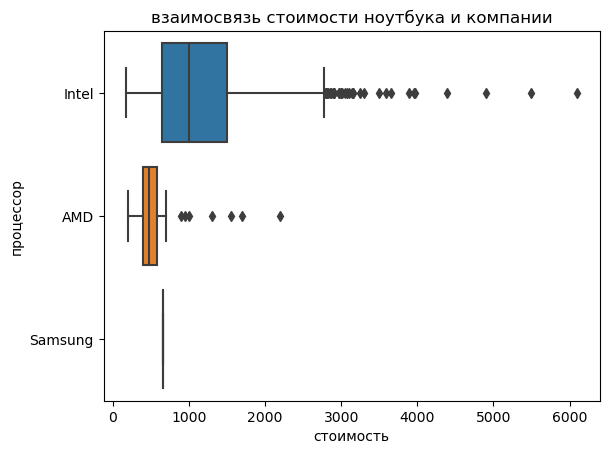

In [67]:
import seaborn as sns
sns.boxplot(x = df['Price_euros'], y = df['Cpu_Company'])

plt.title('взаимосвязь стоимости ноутбука и компании')   
plt.xlabel('стоимость')
plt.ylabel('процессор');


#### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти


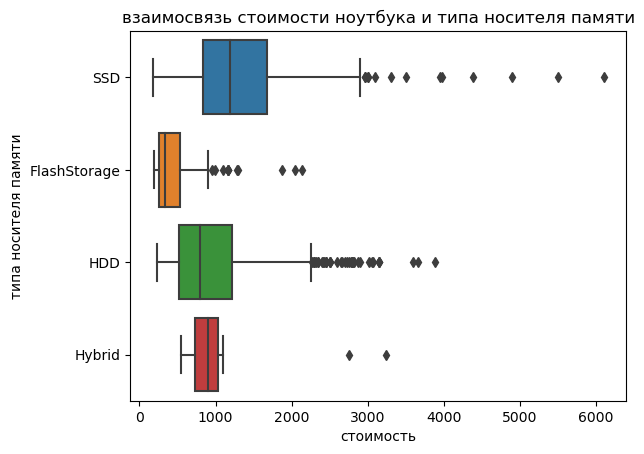

In [69]:
sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], whis=1.5)
plt.xlabel('стоимость')
plt.ylabel('типа носителя памяти')
plt.title('взаимосвязь стоимости ноутбука и типа носителя памяти');

#### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти


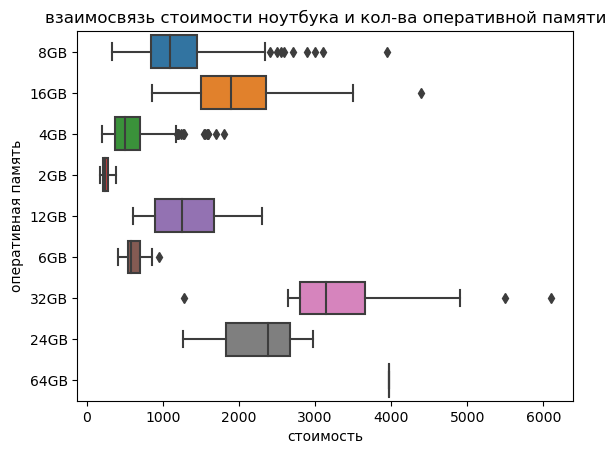

In [70]:
sns.boxplot(x=df['Price_euros'], y=df['Ram'])

plt.xlabel('стоимость')
plt.ylabel('оперативная память')
plt.title('взаимосвязь стоимости ноутбука и кол-ва оперативной памяти');

##### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя


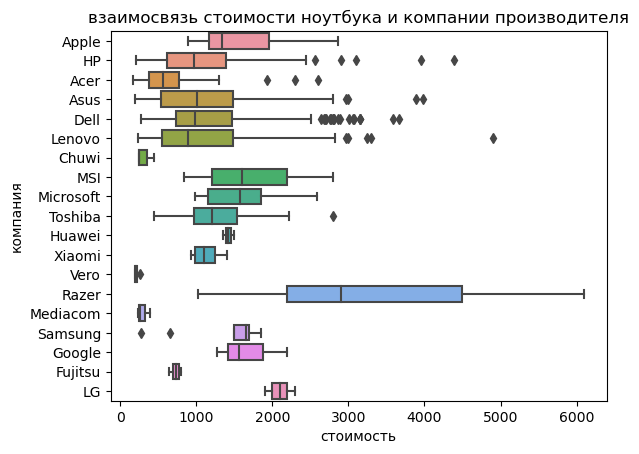

In [71]:
sns.boxplot(x=df['Price_euros'], y=df['Company'])
  
plt.xlabel('стоимость')
plt.ylabel('компания')
plt.title('взаимосвязь стоимости ноутбука и компании производителя');

## Задание 5*

Постройте матрицу корреляций для таблицы


In [83]:
import numpy as np
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.0,0.3
Weight,0.8,1.0,0.0,0.0
Price_euros,0.0,0.0,1.0,0.0
Memory_Amount,0.3,0.0,0.0,1.0


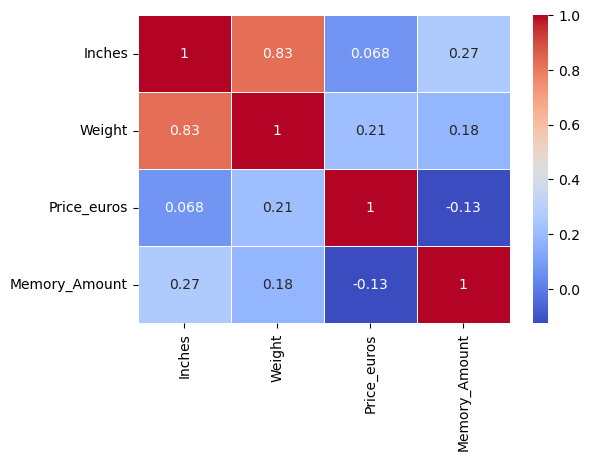

In [73]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');